# Question 3


## 1 

In [23]:
# Cross validation for the model
import numpy as np
import pandas as pd


def cross_validation_error(X,y,model,folds):
    """ 
    Compute the cross validation error for a given Data and model 
    X : the Data matrix and a numpy array of shape (n,d)
    y : the labels vector and a numpy array of shape (n,) 
    model : an instance of a class with fit and predict methods
    folds : the number of folds for the cross validation
    return the average training error and the average validation error as a tuple
    """
    n = X.shape[0]# number of rows
    fold_size = n//folds # size of each fold calculated by dividing the number of rows by the number of folds
    train_errors_list=list()
    validation_errors_list=list()
    for i in range(folds):
        # Split the data into training and validation sets
        validation_indices = list(range(i*fold_size,(i+1)*fold_size))
        training_indices = list(set(range(n))-set(validation_indices))
        X_train = X[training_indices]
        y_train = y[training_indices]
        X_validation = X[validation_indices]
        y_validation = y[validation_indices]
        # Fit the model
        model.fit(X_train,y_train)
        # Compute the error on the training and store it in train errors list
        train_prediction = model.predict(X_train)
        train_error = 1-np.mean(train_prediction==y_train)
        train_errors_list.append(train_error)
        # Compute the error on the validation and store it in validation errors list
        validation_prediction = model.predict(X_validation)
        validation_error = 1-np.mean(validation_prediction==y_validation)
        validation_errors_list.append(validation_error)
      

    #calclate the average of the training and validation errors
    avg_train_error = np.mean(train_errors_list)
    avg_validation_error = np.mean(validation_errors_list)
    return (avg_train_error,avg_validation_error)
        
  

## 2

In [37]:
from sklearn.svm import SVC
def svm_result(X_train, y_train, X_test, y_test):
    """
    run the cross validation error from the previous part with 5 folds and the SVM model for each parameter C=1/lambda for lamda in [0.0001,0.01,1,100,10000]
    X_train : the training Data matrix and a numpy array of shape (n,d)
    y_train : the training labels vector and a numpy array of shape (n,)
    X_test : the test Data matrix and a numpy array of shape (n,d)
    y_test : the test labels vector and a numpy array of shape (n,)
    return dictionary where the keys are the model name and the values are tuples of the average training error the average validation error and the test error
  
    """
    result = {}
    lambdas = [0.0001, 0.01, 1, 100, 10000]
    # iterate over the lambdas and store the results in the dictionary 
    for lmbda in lambdas:
        model = SVC(C=1/lmbda, kernel='linear')
        avg_train_error, avg_validation_error = cross_validation_error(X_train, y_train, model, 5)
        model.fit(X_train, y_train)
        test_prediction = model.predict(X_test)
        test_error = 1 - np.mean(test_prediction == y_test)
        result['SVM_' + str(lmbda)] = (avg_train_error, avg_validation_error, test_error)
    return result    
  

## 3

In [25]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X, y = iris_data['data'], iris_data['target']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [33]:
result=svm_result(X_train, y_train, X_test, y_test)
print(result)

{'SVM_0.0001': (0.0, 0.033333333333333305, 0.16666666666666663), 'SVM_0.01': (0.008333333333333326, 0.024999999999999977, 0.16666666666666663), 'SVM_1': (0.008333333333333304, 0.008333333333333326, 0.033333333333333326), 'SVM_100': (0.0625, 0.07500000000000002, 0.16666666666666663), 'SVM_10000': (0.6416666666666668, 0.6416666666666668, 0.7666666666666666)}


{'0.0001': (0.0, 0.033333333333333305, 0.16666666666666663), '0.01': (0.008333333333333326, 0.024999999999999977, 0.16666666666666663), '1': (0.008333333333333304, 0.008333333333333326, 0.033333333333333326), '100': (0.0625, 0.07500000000000002, 0.16666666666666663), '10000': (0.6416666666666668, 0.6416666666666668, 0.7666666666666666)}


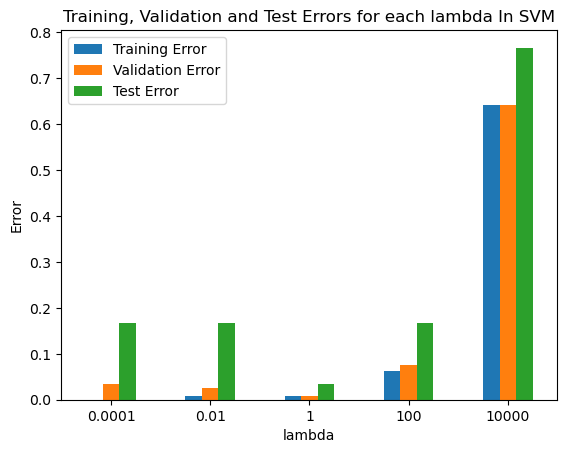

In [41]:
# bar plot for the average training and validation errors for each model and test error for each lamda
import matplotlib.pyplot as plt
#rename the keys of the diciotnary to be the lambdas only
result2 = {k.split('_')[1]:v for k,v in result.items()}

df = pd.DataFrame(result2).T
df.columns = ['Training Error','Validation Error','Test Error']
df.plot(kind='bar')
#set the x to be horizontal
plt.xticks(rotation=0)
plt.title('Training, Validation and Test Errors for each lambda In SVM')
plt.ylabel('Error')
plt.xlabel('lambda')
plt.show()




The best model according to the Cross Validation is where $\lambda=1$.
 It has a good balance between training and validation errors, and importantly, it has the lowest test error, suggesting good generalization to unseen data.
Moreover it is the best model for the test error we can see that for small lambda values the model ovefits, and for higher lambda values it underfits so the cross validation
can find the best model for low train errors too.
 
